# Cubic Spline Fitting



Given a set of points $((x_0, y_0), (x_1, y_1), ...,  (x_n, y_n) $ we have to fit a cubic polynomial between the points such the curve is continuous, and a continous derivative and continous curvature. Lets call this curve $S(x) $

$$ S(x) = \{p^{(k)}(x) | x_k \leq x \leq x_{k+1} \}$$
where $p^{(k)}$ satisfies the following conditions

$$ p^{(k-1)}(x_k) = p^{(k)}(x_k) $$
$$ p^{'(k-1)}(x_k) = p^{'(k)}(x_k) $$
$$ p^{''(k-1)}(x_k) = p^{''(k)}(x_k) $$

Let $M_k = S''(x_k)$ for $k=0, 1, 2, ... N$
then
$$p^{''(k)}(x) = M_k \frac{x - x_{k+1}}{x_k - x_{k+1}} + M_{k+1} \frac{x - x_{k}}{x_{k+1} - x_{k}}$$

Intergrating and solving for arbitary constants using the other conditions we get:

$$p^{(k)}(x) = \frac{M_k}{6h} ((x_{k+1} - x)^3 - h (x_{k+1} - x)) + \frac{M_{k+1}}{6h} ((x - x_k)^3 -h (x - x_k)) + $$
$$ [ \frac{y_{k}}{h} (x_{k+1} - x) + \frac{y_{k+1}}{h} (x - x_k) ] $$

where $h$ is $(x_{k+1} - x_{k})$.

Substituting $x$ with $x_{k-1}, x_{k}$ and $x_{k+1}$ in the above equation we get the following tridiagonal system:

$$ M_{k+1} + 4 M_{k} + M_{k-1} = \frac{6}{h^2} [ f_{k-1} - 2 f_k + f_{k+1} ] $$

$$ k = 0 , \cdots , n $$

given the values of $M_0$ and $M_n$ the system can be solved efficiently using the Thomas Algorithm.


In [1]:
# Code for Cubic Spline problem
def cubic_spline(X, Y, M_0, M_n):
    # Assuming constant spacing
    h = X[1] - X[0]
    n = len(X)
    A = [1 for i in range(n-2)]
    B = [4 for i in range(n-2)]
    C = [1 for i in range(n-2)]
    D = [(6/h**2)*(Y[i-1] - 2*Y[i] + Y[i+1]) for i in range(1, n-1)]

    M = [M_0] + thomas_algorithm(A, B, C, D) + [M_n]

    X_ = []
    Y_ = []
    for k in range(n-1):
        dx = h/10
        for i in range(10):
            x = X[k] + i*dx
            y = (M[k]/(6*h))*((X[k+1] - x)**3 - h*(X[k+1] - x)) + (M[k+1]/(6*h))*((x - X[k])**3 - h*(x - X[k]))+ \
                    Y[k]*(X[k+1] - x)/h + Y[k+1]*(x - X[k])/h
            X_.append(x)
            Y_.append(y)

    return (X_, Y_)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from thomas_algo import thomas_algorithm
X = np.linspace(0, 20, 10)
Y = np.sin(X)
X_, Y_ = cubic_spline(X, Y, 0, 0)

[0, 20, -1, 1]

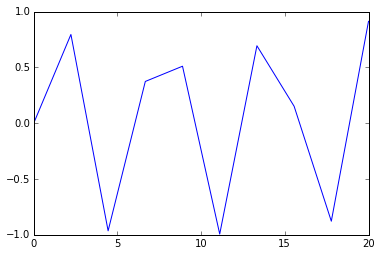

In [3]:
plt.plot(X, Y); plt.axis([0, 20, -1, 1])

[0, 20, -1, 1]

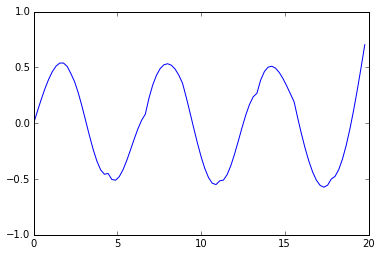

In [4]:
plt.plot(X_, Y_); plt.axis([0, 20, -1, 1])

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
# The stylesheets are taken from the numerical methods mooc at
# http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/info
from IPython.core.display import HTML
css_file = './styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())